In [1]:
import pickle
import pandas as pd
import os
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score, mean_squared_error
import numpy as np
import seaborn as sns

import scienceplots
#plt.style.use(['science', 'ieee', 'notebook'])

In [2]:
binary = os.path.join(os.getcwd(), 'data', 'volve_compiled.pkl')
print(binary)

with open(binary, 'rb') as bin_file:
    data = pickle.load(bin_file)

/mnt/d/Onedrive/Mestrado/gits/sklearn-sid/Volve-Dataset/data/volve_compiled.pkl


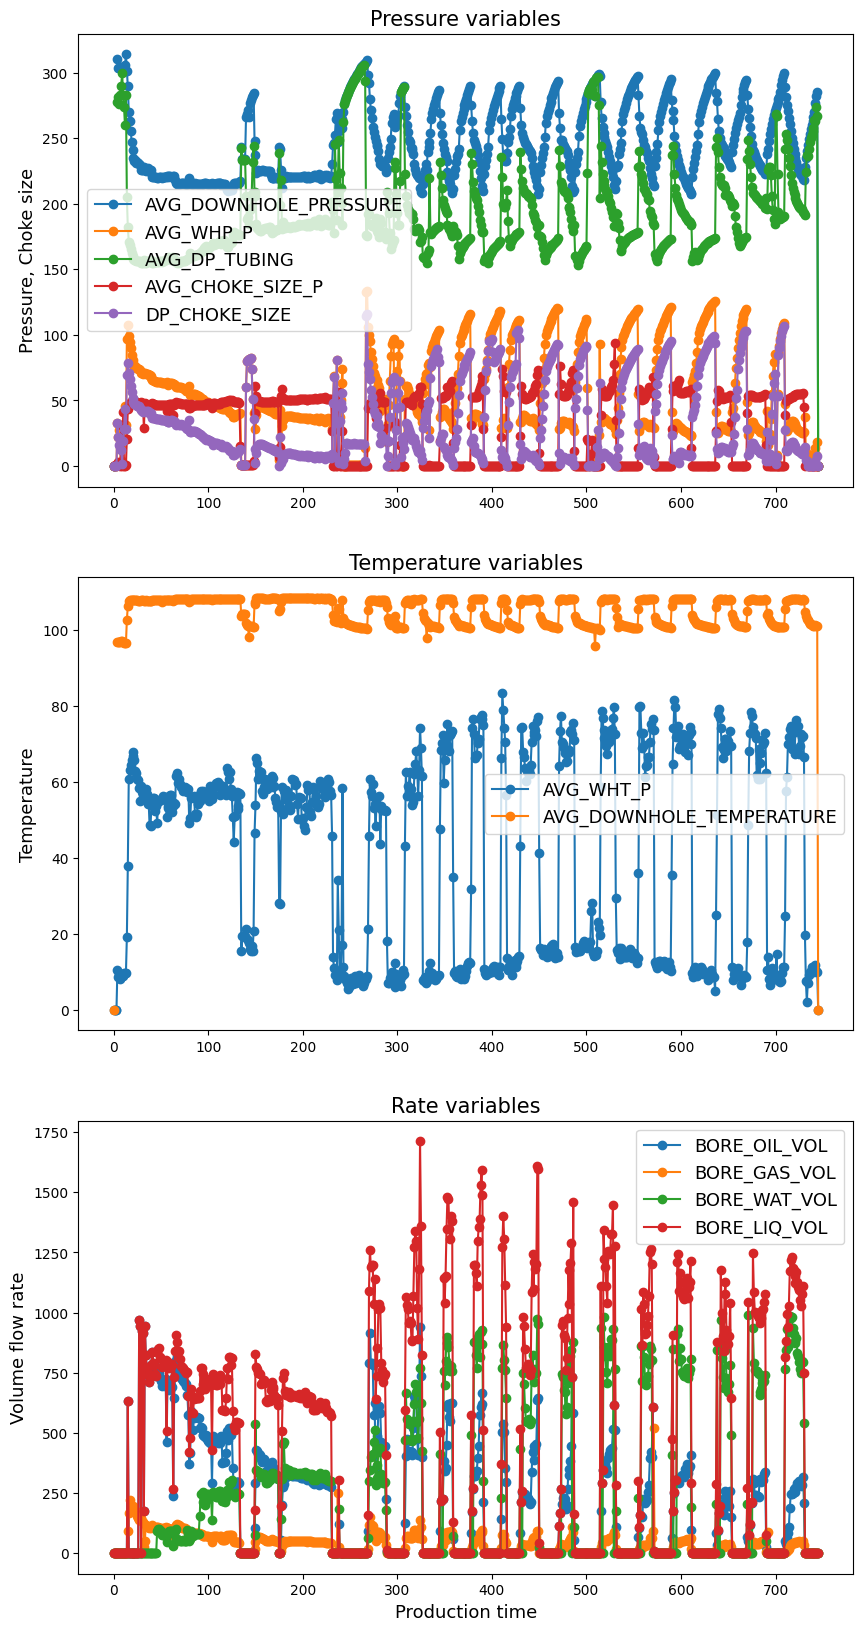

In [3]:
case = "15/9-F-1 C"
#case = "15/9-F-11"

data_case = data['OP'][case]

filt_vars_IN_Q =  [
        'BORE_OIL_VOL',
        'BORE_GAS_VOL',
        'BORE_WAT_VOL',
        #'BORE_OIL_CUM',
        #'BORE_LIQ_CUM',
        #'BORE_GAS_CUM',
        #'BORE_WAT_CUM',
]

filt_vars_IN_QINJ = [
        #'BORE_WI_VOL',
        #'BORE_WI_CUM',
]

filt_vars_IN_P = [
        'AVG_DOWNHOLE_PRESSURE',
        'AVG_WHP_P',
        'AVG_DP_TUBING',
        #'AVG_ANNULUS_PRESS',
        'AVG_CHOKE_SIZE_P',
        'DP_CHOKE_SIZE',
]

filt_vars_IN_T = [
        'AVG_WHT_P',
        'AVG_DOWNHOLE_TEMPERATURE',
]

filt_vars_OUT = [
        'BORE_OIL_VOL',
        'BORE_GAS_VOL',
        'BORE_WAT_VOL',
        'BORE_LIQ_VOL',
]

time = data_case['N']
fig, ax = plt.subplots(3,1, figsize=(10, 20))
for var in filt_vars_IN_P:
    ax[0].plot(time, data_case[var], '-o', label=var)
for var in filt_vars_IN_T:
    ax[1].plot(time, data_case[var], '-o', label=var)
for var in filt_vars_OUT:
    ax[2].plot(time, data_case[var], '-o', label=var)
#for var in filt_vars_OUT:
#    ax[3].plot(time, data_case[var], '-o', label=var)
title_font = 15
label_font = 13
ax[0].set_title(f'Pressure variables', fontsize=title_font)
ax[1].set_title(f'Temperature variables', fontsize=title_font)
ax[2].set_title(f'Rate variables', fontsize=title_font)
ax[0].set_ylabel('Pressure, Choke size', fontsize=label_font)
ax[1].set_ylabel('Temperature', fontsize=label_font)
ax[2].set_ylabel('Volume flow rate', fontsize=label_font)
ax[2].set_xlabel('Production time', fontsize=label_font)
ax[0].legend(fontsize=label_font)
ax[1].legend(fontsize=label_font)
ax[2].legend(fontsize=label_font)

fig.savefig('data/data_example.pdf',  bbox_inches = "tight")

In [4]:
prefix = 'SISO.W1'
binary = os.path.join(os.getcwd(), 'outputs', 'test_runs', f'{prefix}_ml.pkl')
print(binary)

with open(binary, 'rb') as bin_file:
    X1_tr, y_tr, X1_te, y_te, results, order_progression = pickle.load(bin_file)

/mnt/d/Onedrive/Mestrado/gits/sklearn-sid/Volve-Dataset/outputs/test_runs/SISO.W1_ml.pkl


In [5]:
model_pars = []
best_pars = []
yhats = []
lags = []
for index, row in pd.DataFrame(results).iloc[:,:].iterrows():
    print(row['MODEL'])
    yhats.append([f"{row['MODEL']}.{prefix}",row['MODEL OBJ'].predict(X1_te, y_te),row['MODEL OBJ'].predict(X1_te, y_te, steps_ahead=1)])
    try:
        model_pars.append((f"{row['MODEL']}.{prefix}".replace('-Static', '+$u_k$'), row['MODEL OBJ'].estimator.cv_results_))
        best_pars.append((f"{row['MODEL']}.{prefix}".replace('-Static', '+$u_k$'), row['MODEL OBJ'].estimator.best_params_))
        lags.append((f"{row['MODEL']}.{prefix}".replace('-Static', '+$u_k$'), row['MODEL OBJ'].nX))
    except Exception as e: 
        print(e)


LinReg
PolyReg
SVM
KNN
DecisionTree
RandomForest
GradientBoosting
ExtraTrees
MLP


In [6]:
prefix = 'SISO-Static.W1'
binary = os.path.join(os.getcwd(), 'outputs', 'test_runs', f'{prefix}_ml.pkl')
print(binary)

with open(binary, 'rb') as bin_file:
    X1_tr, y_tr, X1_te, y_te, results, order_progression = pickle.load(bin_file)

/mnt/d/Onedrive/Mestrado/gits/sklearn-sid/Volve-Dataset/outputs/test_runs/SISO-Static.W1_ml.pkl


In [7]:

for index, row in pd.DataFrame(results).iloc[:,:].iterrows():
    print(row['MODEL'])
    yhats.append([f"{row['MODEL']}.{prefix}",row['MODEL OBJ'].predict(X1_te, y_te),row['MODEL OBJ'].predict(X1_te, y_te, steps_ahead=1)])
    try:
        model_pars.append((f"{row['MODEL']}.{prefix}".replace('-Static', '+$u_k$'), row['MODEL OBJ'].estimator.cv_results_))
        best_pars.append((f"{row['MODEL']}.{prefix}".replace('-Static', '+$u_k$'), row['MODEL OBJ'].estimator.best_params_))
        lags.append((f"{row['MODEL']}.{prefix}".replace('-Static', '+$u_k$'), row['MODEL OBJ'].nX))
    except Exception as e: 
        print(e)

LinReg
PolyReg
SVM
KNN
DecisionTree
RandomForest
GradientBoosting
ExtraTrees
MLP


In [8]:
prefix = 'MISO.W1'
binary = os.path.join(os.getcwd(), 'outputs', 'test_runs', f'{prefix}_ml.pkl')
print(binary)

with open(binary, 'rb') as bin_file:
    X1_tr, y_tr, X1_te, y_te, results, order_progression = pickle.load(bin_file)

/mnt/d/Onedrive/Mestrado/gits/sklearn-sid/Volve-Dataset/outputs/test_runs/MISO.W1_ml.pkl


In [9]:

for index, row in pd.DataFrame(results).iloc[:,:].iterrows():
    print(row['MODEL'])
    yhats.append([f"{row['MODEL']}.{prefix}",row['MODEL OBJ'].predict(X1_te, y_te),row['MODEL OBJ'].predict(X1_te, y_te, steps_ahead=1)])
    try:
        model_pars.append((f"{row['MODEL']}.{prefix}".replace('-Static', '+$u_k$'), row['MODEL OBJ'].estimator.cv_results_))
        best_pars.append((f"{row['MODEL']}.{prefix}".replace('-Static', '+$u_k$'), row['MODEL OBJ'].estimator.best_params_))
        lags.append((f"{row['MODEL']}.{prefix}".replace('-Static', '+$u_k$'), row['MODEL OBJ'].nX))
    except Exception as e: 
        print(e)

LinReg
PolyReg
SVM
KNN
DecisionTree
RandomForest
GradientBoosting
ExtraTrees
MLP


In [10]:
prefix = 'MISO-Static.W1'
binary = os.path.join(os.getcwd(), 'outputs', 'test_runs', f'{prefix}_ml.pkl')
print(binary)

with open(binary, 'rb') as bin_file:
    X1_tr, y_tr, X1_te, y_te, results, order_progression = pickle.load(bin_file)

/mnt/d/Onedrive/Mestrado/gits/sklearn-sid/Volve-Dataset/outputs/test_runs/MISO-Static.W1_ml.pkl


In [11]:

for index, row in pd.DataFrame(results).iloc[:,:].iterrows():
    print(row['MODEL'])
    yhats.append([f"{row['MODEL']}.{prefix}",row['MODEL OBJ'].predict(X1_te, y_te),row['MODEL OBJ'].predict(X1_te, y_te, steps_ahead=1)])
    try:
        model_pars.append((f"{row['MODEL']}.{prefix}".replace('-Static', '+$u_k$'), row['MODEL OBJ'].estimator.cv_results_))
        best_pars.append((f"{row['MODEL']}.{prefix}".replace('-Static', '+$u_k$'), row['MODEL OBJ'].estimator.best_params_))
        lags.append((f"{row['MODEL']}.{prefix}".replace('-Static', '+$u_k$'), row['MODEL OBJ'].nX))
    except Exception as e: 
        print(e)

LinReg
PolyReg
SVM
KNN
DecisionTree
RandomForest
GradientBoosting
ExtraTrees
MLP


In [12]:
cv_errors = {
    'MODEL' : [],
    'INPUTS': [],
    'SPLIT' : [],
    'R2 SCORE': [],
            }

mlp_data = {
    'INPUTS' : [],
    'R2 MEAN SCORE' : [],
    'R2 STD DEV' : []
    }

times = {
    'MODEL':[],
    'INPUTS': [],
    'TIME MEAN' :[],
    'TIME STD': []
}
for model, model_par in model_pars:
    if 'MLP' in model:
        r2_scores = model_par['mean_test_score'].tolist()
        r2_scores_std = model_par['std_test_score'].tolist()
        n_r2 = len(r2_scores)
        mlp_data['INPUTS'].extend([model.split('.')[1]]*n_r2)
        mlp_data['R2 MEAN SCORE'].extend(r2_scores)
        mlp_data['R2 STD DEV'].extend(r2_scores_std)

    times['MODEL'].append(model.split('.')[0])
    times['INPUTS'].append(model.split('.')[1])
    try:
        best_model = np.where(model_par['rank_test_score'] == 1)[0]
        times['TIME MEAN'].append(model_par['mean_fit_time'][best_model][0])
        times['TIME STD'].append(model_par['std_fit_time'][best_model][0])
    except Exception:
        times['TIME MEAN'].append(None)
        times['TIME STD'].append(None)
    for key in model_par.keys():
        if 'split' in key and '_test_score' in key:
            cv_errors['MODEL'].append(model.split('.')[0])
            cv_errors['INPUTS'].append(model.split('.')[1])
            cv_errors['SPLIT'].append(int(key.split('_')[0][5:]))
            cv_errors['R2 SCORE'].append(model_par[key][best_model][0])
        elif 'MLP' in model and 'param_' in key:
            pname = key[6:]
            if not pname in mlp_data.keys():
                try:
                    mlp_data[pname] = model_par[key].tolist()
                except Exception:
                    mlp_data[pname] = model_par[key]
            else:
                try:
                    mlp_data[pname].extend(model_par[key].tolist())
                except Exception:
                    mlp_data[pname].extend(model_par[key])
            
            

cv_errors = pd.DataFrame(cv_errors)
mlp_data['hidden_layers'] = [len(x) for x in mlp_data['hidden_layer_sizes']]
mlp_data['total_hidden_units'] = [np.sum(x) for x in mlp_data['hidden_layer_sizes']]
mlp_data = pd.DataFrame(mlp_data)
mlp_data.drop(columns=['activation', 'max_iter', 'solver'], inplace=True)
display(mlp_data)

,INPUTS,R2 MEAN SCORE,R2 STD DEV,alpha,batch_size,early_stopping,hidden_layer_sizes,tol,hidden_layers,total_hidden_units
0,SISO,0.702249,0.057943,0.030304,256,False,"(80, 40, 40, 100)",3.019659e-03,4,260
1,SISO,0.772532,0.055266,0.034329,32,True,"(80, 80, 20, 20)",1.643129e-05,4,200
2,SISO,0.725963,0.064230,0.086851,128,False,"(20, 100, 40, 60)",2.306157e-06,4,220
3,SISO,0.756539,0.074461,0.004190,32,False,"(60, 40, 100)",1.917448e-06,3,200
4,SISO,0.757736,0.063278,0.001361,32,True,"(60, 100)",3.058823e-04,2,160
...,...,...,...,...,...,...,...,...,...,...
395,MISO+$u_k$,0.777353,0.042565,0.348421,32,False,"(100, 60, 60, 20)",2.154966e-02,4,240
396,MISO+$u_k$,0.840764,0.052835,0.000114,64,False,"(20, 80, 60, 60)",1.092597e-06,4,220
397,MISO+$u_k$,0.853621,0.039935,0.053043,32,False,"(100, 60, 40, 80)",1.110901e-05,4,280
398,MISO+$u_k$,0.844742,0.055020,0.023639,256,False,"(80, 80, 60, 40)",8.299463e-07,4,260


/tmp/ipykernel_29842/2840094645.py:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs.set_xticklabels(axs.get_xticklabels(),rotation=90)


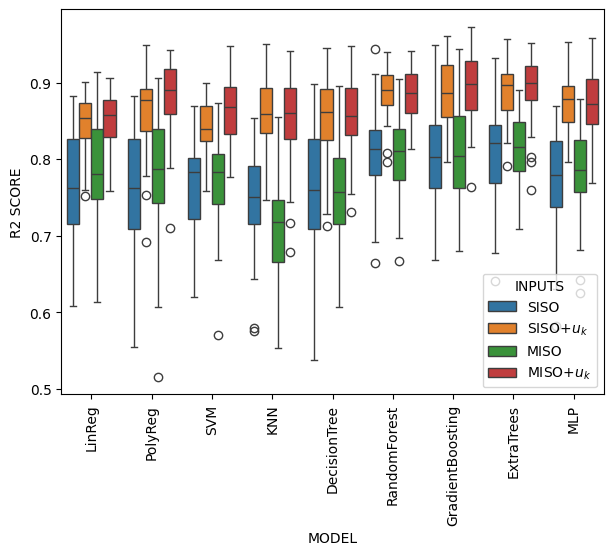

In [13]:
#plt.style.use(['science', 'ieee', 'notebook'])
cv_errors_filt = cv_errors[
    (cv_errors.MODEL == 'LinReg')|
    (cv_errors.MODEL == 'PolyReg')|
    (cv_errors.MODEL == 'MLP')
]
fig, axs = plt.subplots(1,1, figsize=(7,5))
sns.boxplot(data=cv_errors, x='MODEL', y='R2 SCORE', hue='INPUTS', ax=axs)
axs.set_xticklabels(axs.get_xticklabels(),rotation=90)
fig.savefig('./outputs/final_results/boxplot_cv_full.pdf', bbox_inches = "tight")

In [14]:
pd.DataFrame(times)

,MODEL,INPUTS,TIME MEAN,TIME STD
0,LinReg,SISO,0.001296,0.000439
1,PolyReg,SISO,0.001541,0.000342
2,SVM,SISO,0.004583,0.001077
3,KNN,SISO,0.000491,0.000275
4,DecisionTree,SISO,0.001372,0.000282
5,RandomForest,SISO,0.156311,0.015630
6,GradientBoosting,SISO,0.817508,0.036176
7,ExtraTrees,SISO,0.093481,0.013280
8,MLP,SISO,0.432160,0.220667
9,LinReg,SISO+$u_k$,0.002875,0.000872


In [15]:
errors = {
    'MODEL':[],
    'INPUTS':[],
    'R2 OSA TRAIN':[],
    'R2 OSA TEST':[],
    'R2 OSA TOTAL':[],
    'R2 FS TRAIN':[],
    'R2 FS TEST':[],
    'R2 FS TOTAL':[],
    'RMSE OSA TRAIN':[],
    'RMSE OSA TEST':[],
    'RMSE OSA TOTAL':[],
    'RMSE FS TRAIN':[],
    'RMSE FS TEST':[],
    'RMSE FS TOTAL':[],
    }

#fig, ax   = plt.subplots(1,1, figsize=(12,7))
for model, yhat, yhat_OSA in yhats:
    model_name = model.split('.')[0]
    model_input = model.split('.')[1]
    errors['MODEL'].append(model_name)
    errors['INPUTS'].append(model_input)
    #if not model_name in ['PolyReg', 'LinReg', 'MLP']: continue
    print(model)
    print('R2 Train (OSA):', r2_score(y_te.ravel()[:502], yhat_OSA.ravel()[:502]))
    errors['R2 OSA TRAIN'].append(r2_score(y_te.ravel()[:502], yhat_OSA.ravel()[:502]))
    print('R2 Test (OSA):', r2_score(y_te.ravel()[502:], yhat_OSA.ravel()[502:]))
    errors['R2 OSA TEST'].append(r2_score(y_te.ravel()[502:], yhat_OSA.ravel()[502:]))
    print('R2 Full  (OSA):', r2_score(y_te.ravel(), yhat_OSA.ravel()))
    errors['R2 OSA TOTAL'].append(r2_score(y_te.ravel(), yhat_OSA.ravel()))
    print('R2 Train (FS): ', r2_score(y_te.ravel()[:502], yhat.ravel()[:502]))
    errors['R2 FS TRAIN'].append(r2_score(y_te.ravel()[:502], yhat.ravel()[:502]))
    print('R2 Test (FS): ', r2_score(y_te.ravel()[502:], yhat.ravel()[502:]))
    errors['R2 FS TEST'].append(r2_score(y_te.ravel()[502:], yhat.ravel()[502:]))
    print('R2 Full  (FS): ', r2_score(y_te.ravel(), yhat.ravel()))
    errors['R2 FS TOTAL'].append(r2_score(y_te.ravel()[:], yhat.ravel()[:]))
    print('RMSE Train (OSA):', mean_squared_error(y_te.ravel()[:502], yhat_OSA.ravel()[:502])**0.5)
    errors['RMSE OSA TRAIN'].append(mean_squared_error(y_te.ravel()[:502], yhat_OSA.ravel()[:502])**0.5)
    print('RMSE Test (OSA):', mean_squared_error(y_te.ravel()[502:], yhat_OSA.ravel()[502:])**0.5)
    errors['RMSE OSA TEST'].append(mean_squared_error(y_te.ravel()[502:], yhat_OSA.ravel()[502:])**0.5)
    print('RMSE Full  (OSA):', mean_squared_error(y_te.ravel(), yhat_OSA.ravel())**0.5)
    errors['RMSE OSA TOTAL'].append(mean_squared_error(y_te.ravel()[:], yhat_OSA.ravel()[:])**0.5)
    print('RMSE Train (FS): ', mean_squared_error(y_te.ravel()[:502], yhat.ravel()[:502])**0.5)
    errors['RMSE FS TRAIN'].append(mean_squared_error(y_te.ravel()[:502], yhat.ravel()[:502])**0.5)
    print('RMSE Test (FS): ', mean_squared_error(y_te.ravel()[502:], yhat.ravel()[502:])**0.5)
    errors['RMSE FS TEST'].append(mean_squared_error(y_te.ravel()[502:], yhat.ravel()[502:])**0.5)
    print('RMSE Full  (FS): ', mean_squared_error(y_te.ravel(), yhat.ravel())**0.5)
    errors['RMSE FS TOTAL'].append(mean_squared_error(y_te.ravel()[:], yhat.ravel()[:])**0.5)

LinReg.SISO.W1
R2 Train (OSA): 0.7737664713838261
R2 Test (OSA): 0.7756246840150631
R2 Full  (OSA): 0.7763265124528665
R2 Train (FS):  0.3712758916790264
R2 Test (FS):  0.4283372663794476
R2 Full  (FS):  0.3960504082840639
RMSE Train (OSA): 0.12551809732214314
RMSE Test (OSA): 0.1377551893920894
RMSE Full  (OSA): 0.12932128524742822
RMSE Train (FS):  0.2092463636721591
RMSE Test (FS):  0.21988235021653052
RMSE Full  (FS):  0.21250203994029113
PolyReg.SISO.W1
R2 Train (OSA): 0.7737664713838261
R2 Test (OSA): 0.7756246840150631
R2 Full  (OSA): 0.7763265124528665
R2 Train (FS):  0.3712758916790264
R2 Test (FS):  0.4283372663794476
R2 Full  (FS):  0.3960504082840639
RMSE Train (OSA): 0.12551809732214314
RMSE Test (OSA): 0.1377551893920894
RMSE Full  (OSA): 0.12932128524742822
RMSE Train (FS):  0.2092463636721591
RMSE Test (FS):  0.21988235021653052
RMSE Full  (FS):  0.21250203994029113
SVM.SISO.W1
R2 Train (OSA): 0.8131516984901832
R2 Test (OSA): 0.7694132959590332
R2 Full  (OSA): 0.799860

In [16]:
results_df = pd.concat([pd.DataFrame(errors), pd.DataFrame(times).iloc[:,2:]],axis='columns').sort_values('R2 FS TOTAL', ascending=False).reset_index().sort_values('index').reset_index()
results_df['BEST LAG'] = np.array([lag[-1] for lag in lags])
results_df['level_0'] += 1
results_df = results_df[['MODEL', 'INPUTS', 'BEST LAG', 'R2 OSA TRAIN', 'R2 FS TRAIN', 'RMSE OSA TRAIN', 'RMSE FS TRAIN', 'R2 OSA TOTAL', 'R2 FS TOTAL', 'RMSE OSA TOTAL', 'RMSE FS TOTAL', 'TIME MEAN', 'level_0']].round(3)

In [18]:
display(results_df)

,MODEL,INPUTS,BEST LAG,R2 OSA TRAIN,R2 FS TRAIN,RMSE OSA TRAIN,RMSE FS TRAIN,R2 OSA TOTAL,R2 FS TOTAL,RMSE OSA TOTAL,RMSE FS TOTAL,TIME MEAN,level_0
0,LinReg,SISO,2,0.774,0.371,0.126,0.209,0.776,0.396,0.129,0.213,0.001,36
1,PolyReg,SISO,2,0.774,0.371,0.126,0.209,0.776,0.396,0.129,0.213,0.002,35
2,SVM,SISO,20,0.813,0.573,0.114,0.172,0.800,0.607,0.122,0.171,0.005,32
3,KNN,SISO,12,0.999,0.542,0.010,0.179,0.901,0.526,0.086,0.188,0.000,34
4,DecisionTree,SISO,13,0.877,0.652,0.093,0.156,0.819,0.614,0.116,0.170,0.001,31
5,RandomForest,SISO,15,0.917,0.632,0.076,0.160,0.874,0.643,0.097,0.163,0.156,26
6,GradientBoosting,SISO,15,0.964,0.650,0.050,0.156,0.896,0.632,0.088,0.166,0.818,29
7,ExtraTrees,SISO,14,0.949,0.636,0.059,0.159,0.888,0.621,0.092,0.168,0.093,30
8,MLP,SISO,17,0.822,0.620,0.111,0.163,0.796,0.643,0.123,0.163,0.432,25
9,LinReg,SISO-Static,20,0.888,0.684,0.088,0.148,0.874,0.687,0.097,0.153,0.003,21


In [17]:
print(results_df.sort_values('level_0', ascending=True).to_latex(index=False,).replace('000', '').replace('-Static', '+static'))

\begin{tabular}{llrrrrrrrrrrr}
\toprule
MODEL & INPUTS & BEST LAG & R2 OSA TRAIN & R2 FS TRAIN & RMSE OSA TRAIN & RMSE FS TRAIN & R2 OSA TOTAL & R2 FS TOTAL & RMSE OSA TOTAL & RMSE FS TOTAL & TIME MEAN & level_0 \\
\midrule
MLP & MISO+static & 12 & 0.950 & 0.792 & 0.059 & 0.120 & 0.910 & 0.789 & 0.082 & 0.126 & 0.523 & 1 \\
RandomForest & MISO+static & 20 & 0.979 & 0.789 & 0.038 & 0.121 & 0.939 & 0.784 & 0.068 & 0.127 & 0.804 & 2 \\
ExtraTrees & MISO+static & 8 & 0.988 & 0.791 & 0.029 & 0.121 & 0.946 & 0.783 & 0.064 & 0.127 & 0.111 & 3 \\
GradientBoosting & MISO+static & 17 & 0.990 & 0.787 & 0.027 & 0.122 & 0.933 & 0.779 & 0.071 & 0.129 & 1.485 & 4 \\
RandomForest & SISO+static & 19 & 0.964 & 0.772 & 0.050 & 0.126 & 0.931 & 0.762 & 0.072 & 0.134 & 0.400 & 5 \\
GradientBoosting & MISO & 19 & 0.975 & 0.764 & 0.042 & 0.128 & 0.914 & 0.757 & 0.080 & 0.135 & 1.577 & 6 \\
ExtraTrees & SISO+static & 16 & 0.975 & 0.756 & 0.042 & 0.130 & 0.935 & 0.756 & 0.070 & 0.135 & 0.098 & 7 \\
PolyReg & MI

plt.style.use(['science', 'ieee', 'notebook'])
plot_model = ['GradientBoosting', 'ExtraTrees', 'RandomForest', 'MLP']

fig, axs   = plt.subplots(2,1, figsize=(20,16))
for model, yhat, yhat_OSA in yhats:
    model_name = model.split('.')[0]
    #if not model_name in ['PolyReg', 'LinReg', 'MLP']: continue
    if not model_name in plot_model: continue
    if 'MISO' in model:
        ind = 1
    else:
        ind = 0
    axs[ind].plot(yhat, label=', '.join(model.split('.')[:-1]))
    print(model)
    print('RMSE Train (OSA):', mean_squared_error(y_te.ravel()[:502], yhat_OSA.ravel()[:502])**0.5)
    print('RMSE Full  (OSA):', mean_squared_error(y_te.ravel(), yhat_OSA.ravel())**0.5)
    print('RMSE Train (FS): ', mean_squared_error(y_te.ravel()[:502], yhat.ravel()[:502])**0.5)
    print('RMSE Full  (FS): ', mean_squared_error(y_te.ravel(), yhat.ravel())**0.5)
axs[0].set_title('Model comparison with real data (Free run simulation, SISO)', fontsize=title_font)
axs[1].set_title('Model comparison with real data (Free run simulation, MISO)', fontsize=title_font)
for ax in axs:
    ax.plot(y_te, 'o', label='Real data')
    ax.set_xlabel('Time (days)', fontsize=label_font)
    ax.set_ylabel('Normalized Output (Liquid Rate)', fontsize=label_font)
    ax.fill_between(np.arange(0, len(yhat)), 0, 1, where = np.arange(0, len(yhat))<=502,
                facecolor ='grey', alpha = 0.25)
    ax.legend(fontsize=label_font)
    ax.set_xlim(0,None)
    ax.set_ylim(0,1)
    ax.text(10, 0.05, 'Train set', color='grey', fontsize=title_font)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
#fig.savefig(f'./outputs/{plot_model}_comparison_big.pdf')
fig.savefig(f'./outputs/final_results/global_comparison_big.pdf')